In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Drop irrelevant columns
# -------------------
drop_columns = [
    'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
    'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
    'Numerator', 'LocationID', 'DataValueTypeID', 'GeoLocation',
    'Geographic Level', 'StateAbbreviation'
]
df = data.drop(columns=drop_columns, errors='ignore')

# -------------------
# Keep only rows with non-null Category
# -------------------
df = df[df['Category'].notna()]

# -------------------
# Pick first two distinct categories for comparison
# -------------------
unique_categories = df['Category'].unique()
class1_name, class2_name = unique_categories[:2]

# -------------------
# Select categorical columns excluding the target
# -------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Category']

# -------------------
# Fill missing categorical values and encode them
# -------------------
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoders if needed later

# -------------------
# Drop remaining NaNs after encoding
# -------------------
df = df.dropna()

# -------------------
# Filter only the two classes
# -------------------
df_two_classes = df[df['Category'].isin([class1_name, class2_name])]

# -------------------
# Extract feature matrices for each class
# -------------------
class1_data = df_two_classes[df_two_classes['Category'] == class1_name].drop(columns=['Category']).values
class2_data = df_two_classes[df_two_classes['Category'] == class2_name].drop(columns=['Category']).values

# -------------------
# Calculate centroids
# -------------------
centroid1 = np.mean(class1_data, axis=0)
centroid2 = np.mean(class2_data, axis=0)

# -------------------
# Calculate spreads (std deviation)
# -------------------
spread1 = np.std(class1_data, axis=0)
spread2 = np.std(class2_data, axis=0)

# -------------------
# Calculate interclass distance
# -------------------
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

# -------------------
# Print results
# -------------------
print(f"Comparing classes: '{class1_name}' and '{class2_name}'\n")
print("Class 1 centroid (mean vector):", centroid1)
print("Class 2 centroid (mean vector):", centroid2)
print("\nClass 1 spread (std dev vector):", spread1)
print("Class 2 spread (std dev vector):", spread2)
print("\nDistance between centroids:", distance_between_centroids)


Comparing classes: 'Cataract Surgery' and 'Self-Report Cataract'

Class 1 centroid (mean vector): [2.01600000e+03 2.01700000e+03 1.00000000e+00 1.10000000e+01
 1.70000000e+01 2.73540856e+00 9.08560311e-01 2.78599222e+00
 1.73735409e+00 3.90466926e+00 1.66826265e+01 1.38458949e+01
 1.99946304e+01 3.62888132e+03 1.00000000e+00 1.00000000e+00
 1.80000000e+01 1.70000000e+01 2.88715953e+00 9.08560311e-01
 3.38910506e+00 1.73735409e+00 3.90466926e+00]
Class 2 centroid (mean vector): [2.01600000e+03 2.01700000e+03 0.00000000e+00 0.00000000e+00
 1.70000000e+01 2.67350427e+00 9.07692308e-01 2.80683761e+00
 1.73504274e+00 3.78290598e+00 2.34195726e+01 1.97984786e+01
 2.74724274e+01 3.22525641e+03 0.00000000e+00 1.00000000e+01
 3.00000000e+00 1.70000000e+01 2.80341880e+00 9.07692308e-01
 3.28547009e+00 1.73504274e+00 3.78290598e+00]

Class 1 spread (std dev vector): [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.38924129e+00 8.11759791e-01 2.27165718e+00
 1.0563342

Feature: Data_Value

--- Histogram Data (numpy.histogram) ---
Bin 1: 21448 values, Range: [0.00, 10.00)
Bin 2: 3053 values, Range: [10.00, 20.00)
Bin 3: 1169 values, Range: [20.00, 30.00)
Bin 4: 772 values, Range: [30.00, 40.00)
Bin 5: 647 values, Range: [40.00, 50.00)
Bin 6: 575 values, Range: [50.00, 60.00)
Bin 7: 913 values, Range: [60.00, 70.00)
Bin 8: 1441 values, Range: [70.00, 80.00)
Bin 9: 1720 values, Range: [80.00, 90.00)
Bin 10: 1416 values, Range: [90.00, 100.00)


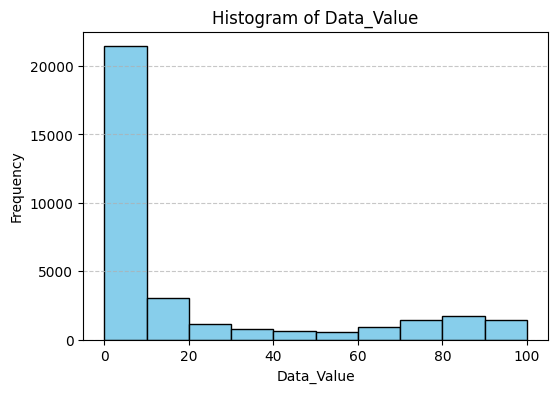


--- Statistics ---
Mean: 19.5856
Variance: 902.2421


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Select numeric feature
# -------------------
feature_name = "Data_Value"  # Change if you want another numeric column

# Drop NaNs and get numeric values
feature_data = data[feature_name].dropna().values

# -------------------
# 1. Histogram data using numpy
# -------------------
num_bins = 10
hist_counts, bin_edges = np.histogram(feature_data, bins=num_bins)

print(f"Feature: {feature_name}")
print("\n--- Histogram Data (numpy.histogram) ---")
for i in range(len(hist_counts)):
    print(f"Bin {i+1}: {hist_counts[i]} values, Range: [{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})")

# -------------------
# 2. Plot histogram using matplotlib
# -------------------
plt.figure(figsize=(6,4))
plt.hist(feature_data, bins=num_bins, color='skyblue', edgecolor='black')
plt.xlabel(feature_name)
plt.ylabel("Frequency")
plt.title(f"Histogram of {feature_name}")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -------------------
# 3. Mean and Variance
# -------------------
mean_val = np.mean(feature_data)
variance_val = np.var(feature_data)

print("\n--- Statistics ---")
print(f"Mean: {mean_val:.4f}")
print(f"Variance: {variance_val:.4f}")


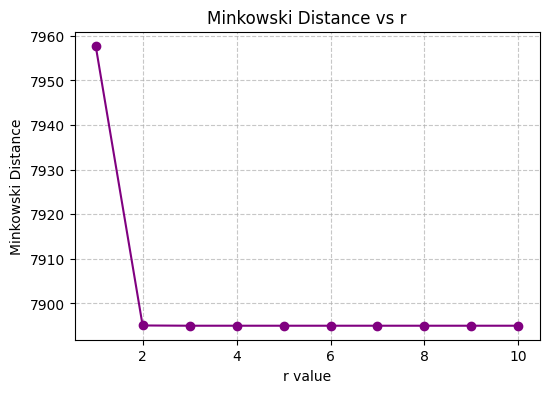

Minkowski Distances between Row 0 and Row 1:
r = 1: Distance = 7957.7998
r = 2: Distance = 7895.0583
r = 3: Distance = 7895.0001
r = 4: Distance = 7895.0000
r = 5: Distance = 7895.0000
r = 6: Distance = 7895.0000
r = 7: Distance = 7895.0000
r = 8: Distance = 7895.0000
r = 9: Distance = 7895.0000
r = 10: Distance = 7895.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.preprocessing import LabelEncoder

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Drop irrelevant columns (from first prompt)
# -------------------
drop_columns = [
    'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
    'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
    'Numerator', 'LocationID', 'DataValueTypeID', 'GeoLocation',
    'Geographic Level', 'StateAbbreviation'
]
data = data.drop(columns=drop_columns, errors='ignore')

# -------------------
# Preprocessing
# -------------------

# Identify categorical feature columns (excluding Category)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Category']

# Fill NaNs in categorical features with "Unknown" and encode
label_encoders = {}
for col in categorical_cols:
    data[col] = data[col].fillna("Unknown")
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Fill NaNs in numeric features with mean
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].mean())

# -------------------
# Drop Category for distance computation
# -------------------
features_only = data.drop(columns=['Category'], errors='ignore')

# -------------------
# Select two rows (feature vectors)
# -------------------
vec1 = features_only.iloc[0].values.astype(float)
vec2 = features_only.iloc[1].values.astype(float)

# -------------------
# Calculate Minkowski distances for r = 1 to 10
# -------------------
r_values = range(1, 11)
distances = [minkowski(vec1, vec2, p=r) for r in r_values]

# -------------------
# Plot the distances
# -------------------
plt.figure(figsize=(6,4))
plt.plot(r_values, distances, marker='o', color='purple')
plt.xlabel("r value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs r")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -------------------
# Print results
# -------------------
print("Minkowski Distances between Row 0 and Row 1:")
for r, dist in zip(r_values, distances):
    print(f"r = {r}: Distance = {dist:.4f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Drop irrelevant columns (from first prompt)
# -------------------
drop_columns = [
    'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
    'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
    'Numerator', 'LocationID', 'DataValueTypeID', 'GeoLocation',
    'Geographic Level', 'StateAbbreviation'
]
data = data.drop(columns=drop_columns, errors='ignore')

# -------------------
# Keep only two classes from Category
# -------------------
two_classes = data['Category'].dropna().unique()[:2]  # pick first two unique categories
data_two = data[data['Category'].isin(two_classes)].copy()

# -------------------
# Encode categorical columns except Category
# -------------------
categorical_cols = data_two.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Category']

label_encoders = {}
for col in categorical_cols:
    data_two[col] = data_two[col].fillna("Unknown")
    le = LabelEncoder()
    data_two[col] = le.fit_transform(data_two[col])
    label_encoders[col] = le

# -------------------
# Fill numeric NaNs with column mean
# -------------------
for col in data_two.select_dtypes(include=['number']).columns:
    data_two[col] = data_two[col].fillna(data_two[col].mean())

# -------------------
# Drop any remaining NaNs just in case
# -------------------
data_two = data_two.dropna()

# -------------------
# Prepare X (features) and y (labels)
# -------------------
X = data_two.drop(columns=['Category'])
y = data_two['Category']

# Encode target labels
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# -------------------
# Train-test split (70% train, 30% test)
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# -------------------
# Print results
# -------------------
print(f"Classes: {list(y_encoder.classes_)}")
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nSample y_train labels (encoded):", y_train[:10])


Classes: ['Cataract Surgery', 'Self-Report Cataract']
Train set size: 1323
Test set size: 567

Sample y_train labels (encoded): [0 1 0 1 0 1 0 0 0 1]


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------
# Train kNN classifier
# -------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# -------------------
# Predictions
# -------------------
y_pred = knn.predict(X_test)

# -------------------
# Evaluation
# -------------------
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5855379188712522

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       284
           1       0.59      0.58      0.58       283

    accuracy                           0.59       567
   macro avg       0.59      0.59      0.59       567
weighted avg       0.59      0.59      0.59       567

Confusion Matrix:
[[167 117]
 [118 165]]


In [ ]:
test_accuracy = knn.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5855


In [ ]:
# -------------------
# Predict for the entire test set
# -------------------
y_pred_all = knn.predict(X_test)
print("Predicted classes for test set:\n", y_pred_all)

# -------------------
# Predict for a single test vector
# -------------------
single_test_vector = X_test.iloc[0].values.reshape(1, -1)  # first sample from test set
single_prediction = knn.predict(single_test_vector)
print("\nSingle test vector prediction:", single_prediction)
print("Actual class:", y_test[0])


Predicted classes for test set:
 [1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy with k=1 (NN): 0.5520282186948854
Accuracy with k=3 (kNN): 0.5855379188712522


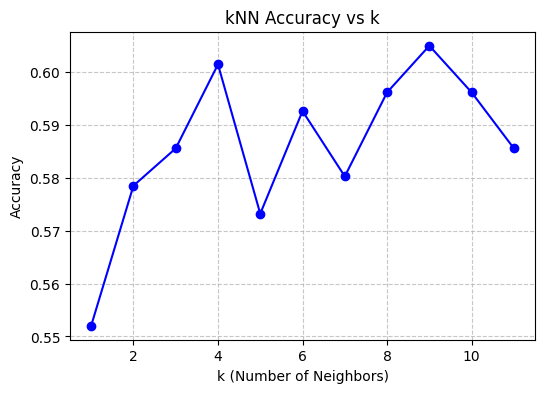

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -------------------
# Store accuracies for each k
# -------------------
k_values = range(1, 12)  # 1 to 11
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)

# -------------------
# Print comparison for k=1 and k=3
# -------------------
print(f"Accuracy with k=1 (NN): {accuracies[0]}")
print(f"Accuracy with k=3 (kNN): {accuracies[2]}")

# -------------------
# Plot accuracy vs k
# -------------------
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy vs k")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# -------------------
# Predictions on train and test sets
# -------------------
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# -------------------
# Confusion Matrices
# -------------------
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))

# -------------------
# Classification Reports
# -------------------
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


Confusion Matrix (Train):
 [[475 186]
 [179 483]]

Confusion Matrix (Test):
 [[173 111]
 [124 159]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       661
           1       0.72      0.73      0.73       662

    accuracy                           0.72      1323
   macro avg       0.72      0.72      0.72      1323
weighted avg       0.72      0.72      0.72      1323


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       284
           1       0.59      0.56      0.58       283

    accuracy                           0.59       567
   macro avg       0.59      0.59      0.59       567
weighted avg       0.59      0.59      0.59       567



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Drop irrelevant columns
# -------------------
drop_columns = [
    'LocationAbbr', 'LocationDesc', 'DataSource', 'Data_Value_Unit',
    'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
    'Numerator', 'LocationID', 'DataValueTyAutomated Detection and Counting of Windows using UAV Imagery based Remote SensingpeID', 'GeoLocation',
    'Geographic Level', 'StateAbbreviation'
]
df = data.drop(columns=drop_columns, errors='ignore')

# -------------------
# Keep only rows with non-null Category
# -------------------
df = df[df['Category'].notna()]

# -------------------
# Pick first two distinct categories
# -------------------
unique_categories = df['Category'].unique()
class1_name, class2_name = unique_categories[:2]
df = df[df['Category'].isin([class1_name, class2_name])]

# -------------------
# Select categorical columns excluding the target
# -------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Category']

# -------------------
# Fill missing categorical values and encode them
# -------------------
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------
# Drop remaining NaNs after encoding
# -------------------
df = df.dropna()

# -------------------
# Prepare X and y
# -------------------
X = df.drop(columns=['Category'])
y = LabelEncoder().fit_transform(df['Category'])

# -------------------
# Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------
# Train kNN
# -------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# -------------------
# Predictions
# -------------------
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# -------------------
# Metrics
# -------------------
print("Confusion Matrix - Train:\n", confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix - Test:\n", confusion_matrix(y_test, y_test_pred))

print("\nClassification Report - Train:")
print(classification_report(y_train, y_train_pred))

print("Classification Report - Test:")
print(classification_report(y_test, y_test_pred))

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if train_acc < 0.8 and test_acc < 0.8:
    print("\nInference: Model is UNDERFITTING.")
elif train_acc > 0.95 and (train_acc - test_acc) > 0.1:
    print("\nInference: Model is OVERFITTING.")
else:
    print("\nInference: Model has a REGULAR FIT.")


Confusion Matrix - Train:
 [[248 112]
 [113 296]]

Confusion Matrix - Test:
 [[ 45 109]
 [ 95  81]]

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       360
           1       0.73      0.72      0.72       409

    accuracy                           0.71       769
   macro avg       0.71      0.71      0.71       769
weighted avg       0.71      0.71      0.71       769

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.32      0.29      0.31       154
           1       0.43      0.46      0.44       176

    accuracy                           0.38       330
   macro avg       0.37      0.38      0.37       330
weighted avg       0.38      0.38      0.38       330

Train Accuracy: 0.7074
Test Accuracy: 0.3818

Inference: Model is UNDERFITTING.


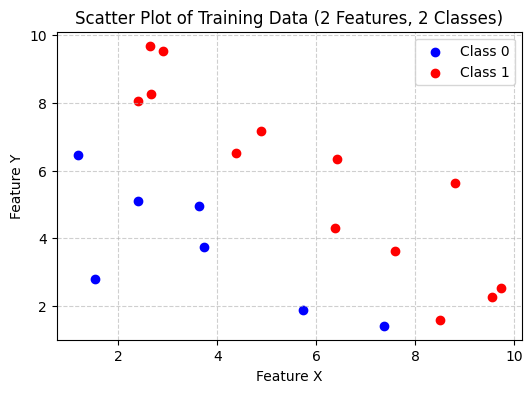

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------
# Generate random data
# -------------------
np.random.seed(42)  # for reproducibility
X_feature = np.random.uniform(1, 10, 20)  # 20 random values between 1 and 10
Y_feature = np.random.uniform(1, 10, 20)

# -------------------
# Assign classes based on a simple rule (for example: if X + Y > 10 → class1 else class0)
# -------------------
classes = np.where(X_feature + Y_feature > 10, 1, 0)

# -------------------
# Scatter plot
# -------------------
plt.figure(figsize=(6, 4))
for class_label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(
        X_feature[classes == class_label],
        Y_feature[classes == class_label],
        color=color,
        label=f'Class {class_label}'
    )

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data (2 Features, 2 Classes)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


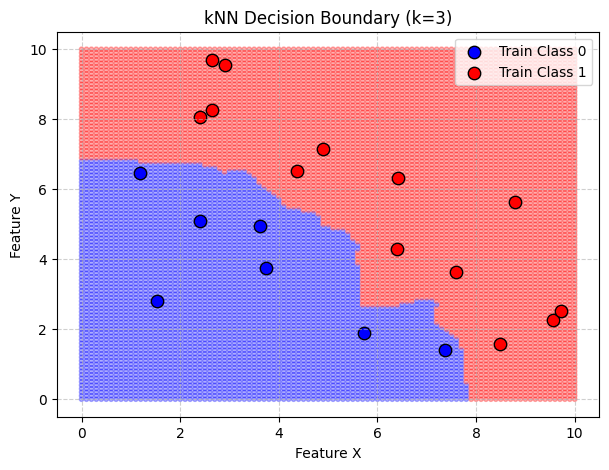

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# -------------------
# Step 1: Generate training data (from A3)
# -------------------
np.random.seed(42)
X_feature = np.random.uniform(1, 10, 20)
Y_feature = np.random.uniform(1, 10, 20)
classes = np.where(X_feature + Y_feature > 10, 1, 0)  # simple rule

# Combine into training feature matrix
X_train = np.column_stack((X_feature, Y_feature))
y_train = classes

# -------------------
# Step 2: Create test data grid (0 to 10 in 0.1 steps)
# -------------------
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
X_test_grid = np.c_[xx.ravel(), yy.ravel()]  # shape (~10,000, 2)

# -------------------
# Step 3: Train kNN classifier (k = 3)
# -------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# -------------------
# Step 4: Predict classes for grid points
# -------------------
predicted_classes = knn.predict(X_test_grid)

# -------------------
# Step 5: Scatter plot - Decision regions
# -------------------
plt.figure(figsize=(7, 5))

# Plot the test grid points colored by predicAutomated Detection and Counting of Windows using UAV Imagery based Remote Sensingted class
plt.scatter(
    X_test_grid[:, 0], X_test_grid[:, 1],
    c=predicted_classes, cmap=plt.cm.bwr, alpha=0.3, s=10
)

# Overlay the training points
for class_label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(
        X_train[y_train == class_label, 0],
        X_train[y_train == class_label, 1],
        color=color, edgecolor='black', s=80, label=f'Train Class {class_label}'
    )

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Decision Boundary (k=3)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


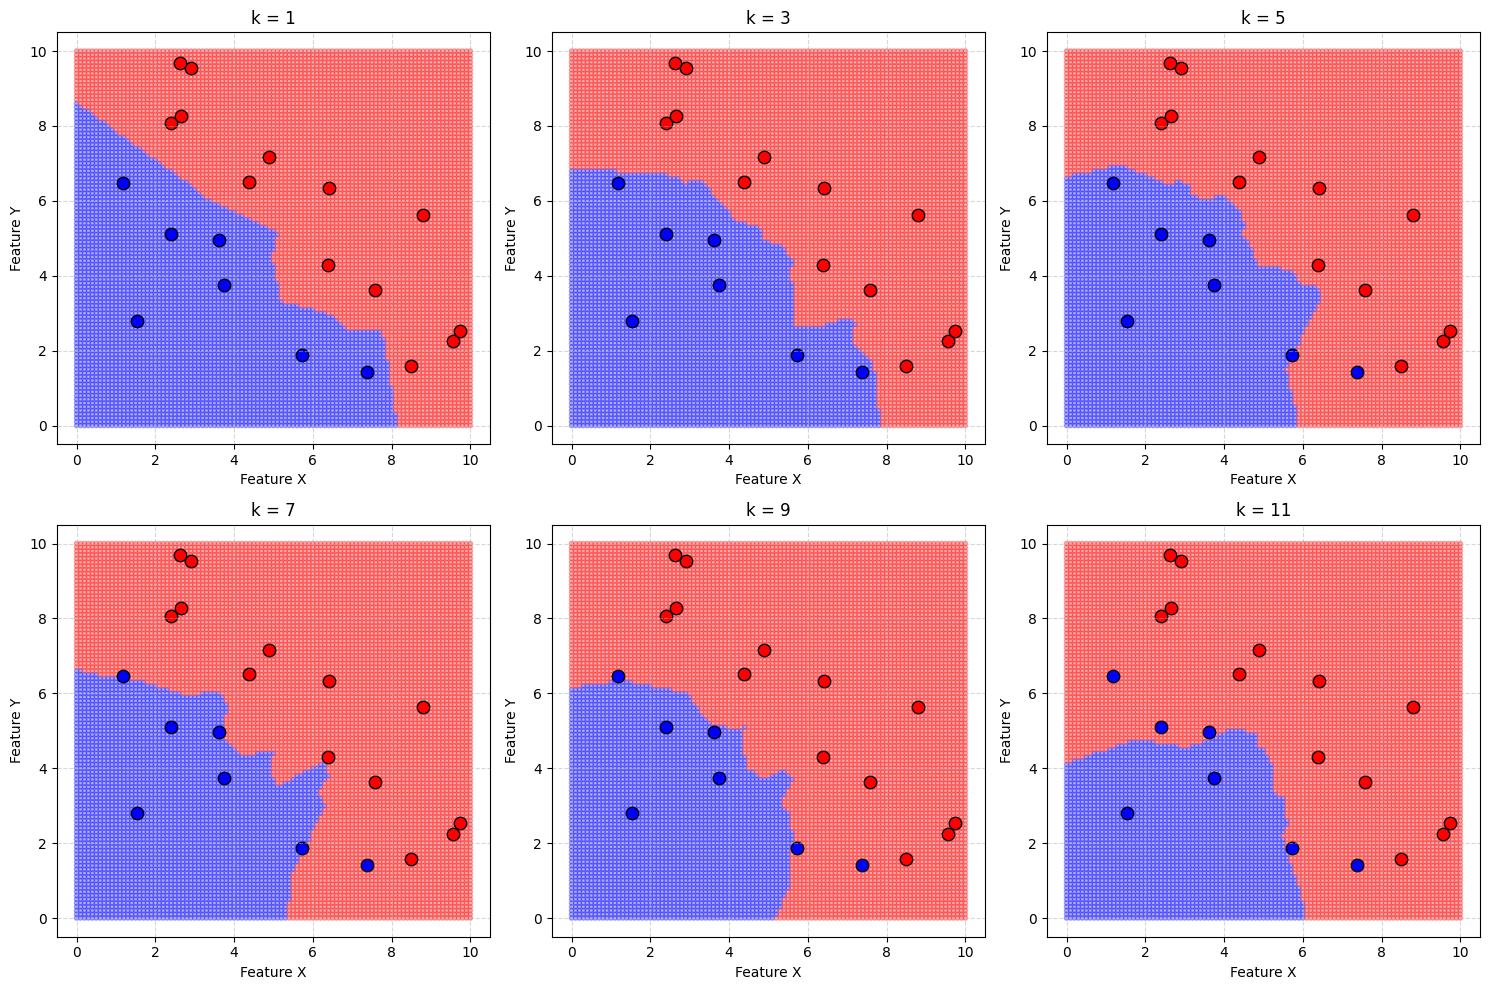

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# -------------------
# Step 1: Generate training data (same as A3)
# -------------------
np.random.seed(42)
X_feature = np.random.uniform(1, 10, 20)
Y_feature = np.random.uniform(1, 10, 20)
classes = np.where(X_feature + Y_feature > 10, 1, 0)

X_train = np.column_stack((X_feature, Y_feature))
y_train = classes

# -------------------
# Step 2: Create test data grid
# -------------------
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
X_test_grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------
# Step 3: Loop for different k values
# -------------------
k_values = [1, 3, 5, 7, 9, 11]
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted_classes = knn.predict(X_test_grid)

    # Plot decision boundaries
    plt.subplot(2, 3, i)
    plt.scatter(
        X_test_grid[:, 0], X_test_grid[:, 1],
        c=predicted_classes, cmap=plt.cm.bwr, alpha=0.3, s=10
    )

    # Overlay training points
    for class_label, color in zip([0, 1], ['blue', 'red']):
        plt.scatter(
            X_train[y_train == class_label, 0],
            X_train[y_train == class_label, 1],
            color=color, edgecolor='black', s=80
        )

    plt.title(f"k = {k}")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

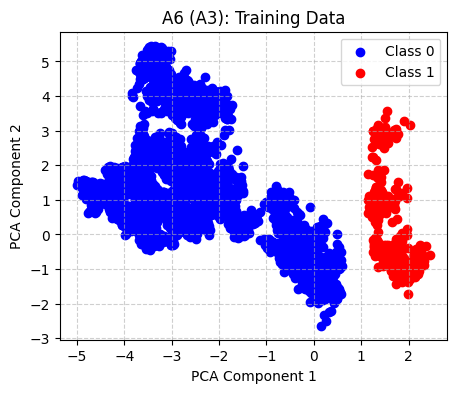

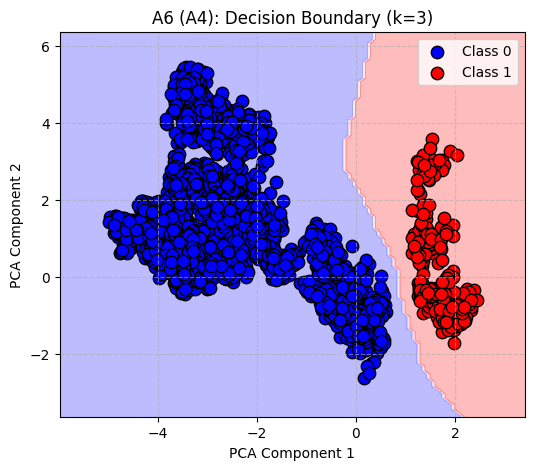

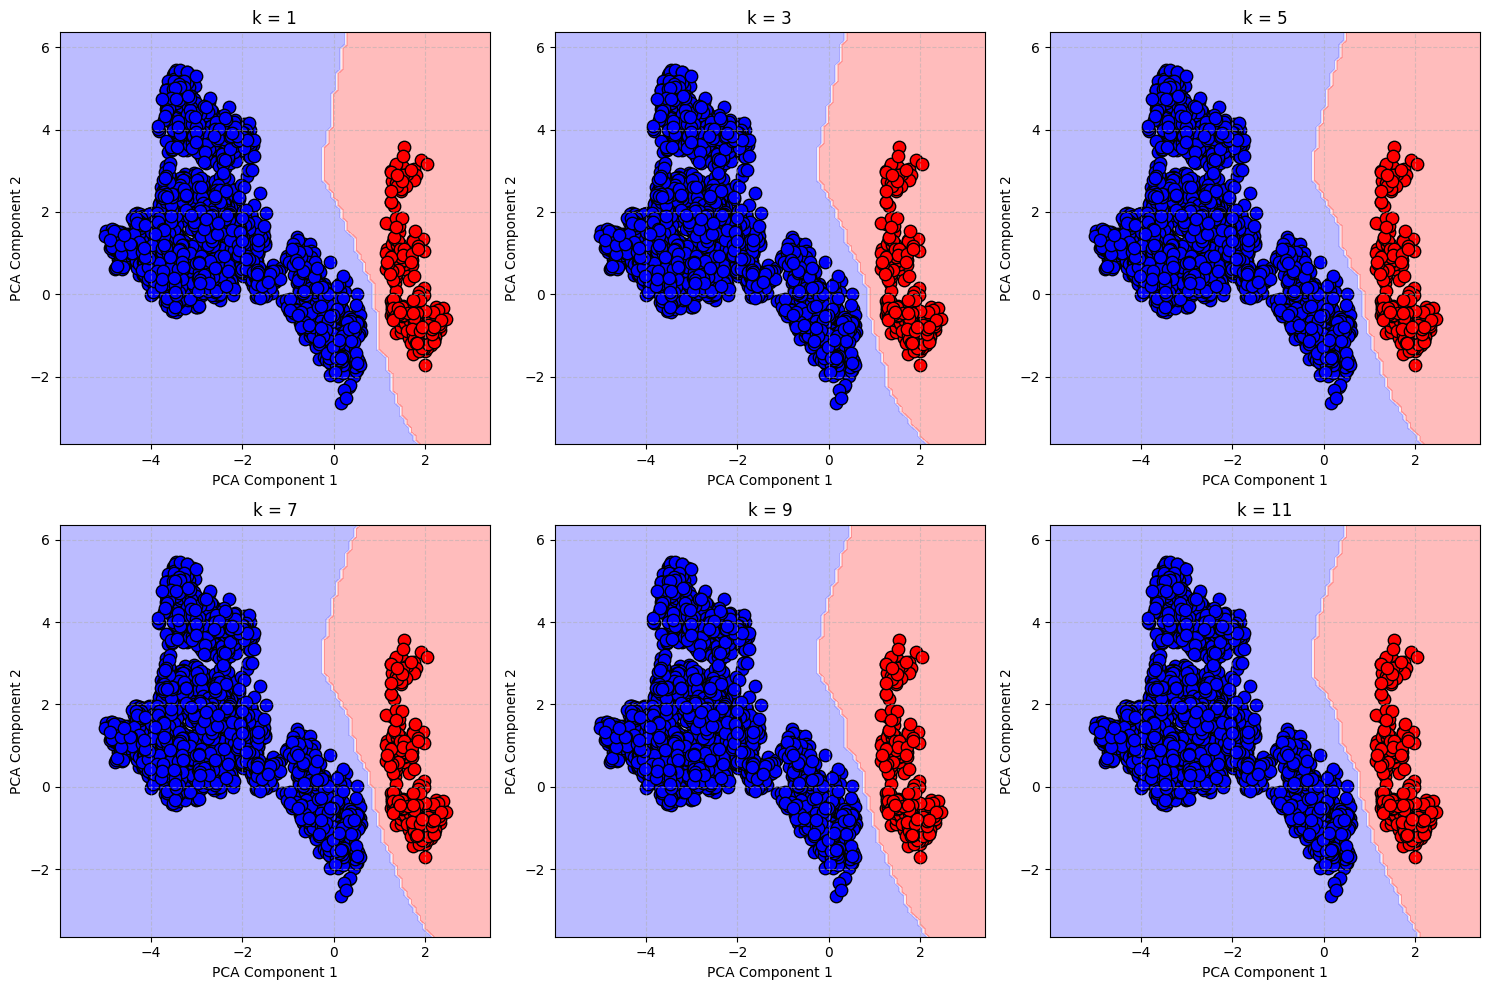

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# -------------------
# Load and preprocess
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

drop_columns = [
    'Category', 'LocationAbbr', 'LocationDesc', 'DataSource',
    'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote', 'Numerator', 'LocationID', 'DataValueTypeID',
    'GeoLocation', 'Geographic Level', 'StateAbbreviation'
]
X = data.drop(columns=drop_columns, errors='ignore')

categorical_cols = [
    "Topic", "Question", "Response", "Age", "Sex", "RaceEthnicity",
    "RiskFactor", "RiskFactorResponse", "TopicID", "CategoryID",
    "QuestionID", "ResponseID", "AgeID", "SexID", "RaceEthnicityID",
    "RiskFactorID", "RiskFactorResponseID", "YearStart", "YearEnd"
]

# Fill missing categorical values before encoding
X[categorical_cols] = X[categorical_cols].fillna("Unknown")

# Label encode categoricals
for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# Drop rows with missing numeric values
X = X.dropna()

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
n_components = min(23, X_std.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# -------------------
# Target variable (we'll take Category from original data)
# -------------------
y = data.loc[X.index, 'Category']
y = y.fillna("Unknown")
y = LabelEncoder().fit_transform(y)

# -------------------
# Pick two PCA components as "features" for visualization
# -------------------
X_selected = X_pca[:, :2]

# Filter for only two classes (first two unique)
two_classes = np.unique(y)[:2]
mask = np.isin(y, two_classes)
X_selected = X_selected[mask]
y_selected = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.3, random_state=42, stratify=y_selected
)

# -------------------
# A3: Plot training data
# -------------------
plt.figure(figsize=(5, 4))
for class_label, color in zip(two_classes, ['blue', 'red']):
    plt.scatter(
        X_train[y_train == class_label, 0],
        X_train[y_train == class_label, 1],
        color=color, label=f'Class {class_label}'
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("A6 (A3): Training Data")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# -------------------
# Prepare test grid
# -------------------
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)
X_test_grid = np.c_[xx.ravel(), yy.ravel()]

# -------------------
# A4: Decision boundary for k=3
# -------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_classes = knn.predict(X_test_grid)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, pred_classes.reshape(xx.shape), cmap=plt.cm.bwr, alpha=0.3)
for class_label, color in zip(two_classes, ['blue', 'red']):
    plt.scatter(
        X_train[y_train == class_label, 0],
        X_train[y_train == class_label, 1],
        color=color, edgecolor='black', s=80, label=f'Class {class_label}'
    )
plt.title("A6 (A4): Decision Boundary (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# -------------------
# A5: Decision boundaries for multiple k values
# -------------------
k_values = [1, 3, 5, 7, 9, 11]
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_classes = knn.predict(X_test_grid)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, pred_classes.reshape(xx.shape), cmap=plt.cm.bwr, alpha=0.3)
    for class_label, color in zip(two_classes, ['blue', 'red']):
        plt.scatter(
            X_train[y_train == class_label, 0],
            X_train[y_train == class_label, 1],
            color=color, edgecolor='black', s=80
        )
    plt.title(f"k = {k}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Drop columns
# -------------------
drop_columns = [
    'Category', 'LocationAbbr', 'LocationDesc', 'DataSource',
    'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote', 'Numerator', 'LocationID', 'DataValueTypeID',
    'GeoLocation', 'Geographic Level', 'StateAbbreviation'
]
X = data.drop(columns=drop_columns, errors='ignore')

# -------------------
# Target variable
# -------------------
y = data['Category']

# -------------------
# Encode categorical columns
# -------------------
categorical_cols = [
    "Topic", "Question", "Response", "Age", "Sex", "RaceEthnicity",
    "RiskFactor", "RiskFactorResponse", "TopicID", "CategoryID",
    "QuestionID", "ResponseID", "AgeID", "SexID", "RaceEthnicityID",
    "RiskFactorID", "RiskFactorResponseID", "YearStart", "YearEnd"
]

X[categorical_cols] = X[categorical_cols].fillna("Unknown")

for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# -------------------
# Drop NaNs
# -------------------
X = X.dropna()
y = y.loc[X.index]  # keep target aligned

# -------------------
# Standardize
# -------------------
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# -------------------
# PCA (optional, for dimensionality reduction)
# -------------------
n_components = min(23, X_std.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# -------------------
# Train/Test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# -------------------
# GridSearchCV for optimal k
# -------------------
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# -------------------
# Best k value
# -------------------
best_k = grid_search.best_params_['n_neighbors']
print("Best k found:", best_k)
print("Best cross-validation accuracy:", grid_search.best_score_)

# -------------------
# Final evaluation on test set
# -------------------
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))


Best k found: 19
Best cross-validation accuracy: 0.8161221449356948
Test set accuracy: 0.8294374905745739


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -------------------
# Load dataset
# -------------------
data = pd.read_csv('dataset(National_Health_Interview_Surve).csv')

# -------------------
# Drop columns
# -------------------
drop_columns = [
    'Category', 'LocationAbbr', 'LocationDesc', 'DataSource',
    'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote', 'Numerator', 'LocationID', 'DataValueTypeID',
    'GeoLocation', 'Geographic Level', 'StateAbbreviation'
]
X = data.drop(columns=drop_columns, errors='ignore')

# -------------------
# Target variable
# -------------------
y = data['Category']

# -------------------
# Encode categorical columns
# -------------------
categorical_cols = [
    "Topic", "Question", "Response", "Age", "Sex", "RaceEthnicity",
    "RiskFactor", "RiskFactorResponse", "TopicID", "CategoryID",
    "QuestionID", "ResponseID", "AgeID", "SexID", "RaceEthnicityID",
    "RiskFactorID", "RiskFactorResponseID", "YearStart", "YearEnd"
]

X[categorical_cols] = X[categorical_cols].fillna("Unknown")

for col in categorical_cols:
    if col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# -------------------
# Drop NaNs
# -------------------
X = X.dropna()
y = y.loc[X.index]  # keep target aligned

# -------------------
# Standardize
# -------------------
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# -------------------
# PCA (optional, for dimensionality reduction)
# -------------------
n_components = min(23, X_std.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# -------------------
# Train/Test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# -------------------
# RandomizedSearchCV for optimal k
# -------------------
param_dist = {'n_neighbors': list(range(1, 51))}  # wider search space
knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=15,  # number of random combinations to try
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# -------------------
# Best k value
# -------------------
best_k = random_search.best_params_['n_neighbors']
print("Best k found:", best_k)
print("Best cross-validation accuracy:", random_search.best_score_)

# -------------------
# Final evaluation on test set
# -------------------
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))


Best k found: 18
Best cross-validation accuracy: 0.8148026279314742
Test set accuracy: 0.8247624792640628
